# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [77]:
sns.set()

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

In [4]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
print(data.shape)
print(data.isnull().sum().any())
print(data.duplicated().any())
type(data["USD_Worldwide_Gross"][0])

(5391, 6)
False
False


str

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [6]:
data["USD_Production_Budget"] = pd.to_numeric(data["USD_Production_Budget"].astype(str).str.replace("$", "").astype(str).str.replace(",", ""))
data["USD_Worldwide_Gross"] = pd.to_numeric(data["USD_Worldwide_Gross"].astype(str).str.replace("$", "").astype(str).str.replace(",", ""))
data["USD_Domestic_Gross"] = pd.to_numeric(data["USD_Domestic_Gross"].astype(str).str.replace("$", "").astype(str).str.replace(",", ""))

/var/folders/_j/5p48krrn6lx6tnvsyf6p97280000gn/T/ipykernel_21494/3666806123.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["USD_Production_Budget"] = pd.to_numeric(data["USD_Production_Budget"].astype(str).str.replace("$", "").astype(str).str.replace(",", ""))
/var/folders/_j/5p48krrn6lx6tnvsyf6p97280000gn/T/ipykernel_21494/3666806123.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["USD_Worldwide_Gross"] = pd.to_numeric(data["USD_Worldwide_Gross"].astype(str).str.replace("$", "").astype(str).str.replace(",", ""))
/var/folders/_j/5p48krrn6lx6tnvsyf6p97280000gn/T/ipykernel_21494/3666806123.py:3: FutureWarning: The default value of regex will change from True 

In [7]:
type(data["Release_Date"][0])

str

In [8]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [9]:
print(type(data["Release_Date"][0]))
data["Release_Date"] = data["Release_Date"].astype(str).str.replace("/", "-")
data["Release_Date"] = pd.to_datetime(data["Release_Date"])

<class 'str'>


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [11]:
print(f"The average production budget of the films in the data set is: ${data['USD_Production_Budget'].mean()}")
print(f"the average worldwide gross revenue of films is: ${data['USD_Worldwide_Gross'].mean()}")
print(f"the minimums for worldwide and domestic revenue are: {data['USD_Worldwide_Gross'].min()} and {data['USD_Domestic_Gross'].min()} respectively")

The average production budget of the films in the data set is: $31113737.57837136
the average worldwide gross revenue of films is: $88855421.96271564
the minimums for worldwide and domestic revenue are: 0 and 0 respectively


In [12]:
world_wide_gross_revenue_sorted_data = data.sort_values(by="USD_Worldwide_Gross")

In [13]:
highest_profit_and_budget_data = data.sort_values(by=["USD_Worldwide_Gross", "USD_Production_Budget"], ascending=False)

In [14]:
data_with_revenue_column_added = data["USD_Worldwide_Gross"] - data["USD_Production_Budget"]
data.insert(6, "USD_Gross_Revenue", data_with_revenue_column_added)

In [15]:
print(f"The lowest Revenue/Profit made by any film was: ${data['USD_Gross_Revenue'].min()} of {data['Movie_Title'].loc[data['USD_Gross_Revenue'].idxmin()]}")
print(f"The highest Revenue/Profit made by any film was : ${data['USD_Gross_Revenue'].max()} movie title: {data['Movie_Title'].loc[data['USD_Gross_Revenue'].idxmax()]}")

The lowest Revenue/Profit made by any film was: $-175000000 of Singularity
The highest Revenue/Profit made by any film was : $2358918982 movie title: Avatar


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [16]:
data[data["USD_Domestic_Gross"] == 0].value_counts().count()

512

In [17]:
data[data["USD_Domestic_Gross"] == 0].sort_values(by="USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Gross_Revenue
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [18]:
data[data["USD_Worldwide_Gross"] == 0].value_counts().count()

357

In [19]:
data[data["USD_Worldwide_Gross"] == 0].sort_values(by="USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Gross_Revenue
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000


### Filtering on Multiple Conditions

In [20]:
international_releases = data.loc[(data["USD_Domestic_Gross"] == 0) & data["USD_Worldwide_Gross"] != 0]

In [21]:
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Gross_Revenue
2309,4623,2004-10-12,Freeze Frame,2000000,105377,0,-1894623
2579,4531,2005-12-31,Chicken Tikka Masala,2160000,37865,0,-2122135
2809,3592,2006-11-24,Kurtlar vadisi - Irak,8300000,24906717,0,16606717
2889,3666,2007-04-09,The Death and Life of Bobby Z,8000000,414617,0,-7585383
3049,1927,2007-12-31,Alatriste,28000000,22860477,0,-5139523
...,...,...,...,...,...,...,...
5305,4147,2016-12-31,Airlift (2016),4400000,9969237,0,5569237
5317,3791,2017-01-31,Two Lovers and a Bear,6840000,22273,0,-6817727
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439


|**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [22]:
international_releases = data.query(expr=f"USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")

In [23]:
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Gross_Revenue
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0,-3963370


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [24]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [37]:
movies_not_released_yet = data[data["Release_Date"] > scrape_date]
movies_not_released_yet.value_counts().count()
movies_not_released_yet

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Gross_Revenue
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


In [43]:
data["Release_Date"].sort_values()
data.shape

(5391, 7)

In [40]:
labels_to_drop = [index for index in movies_not_released_yet.index]

In [41]:
data_clean = data.drop(labels=labels_to_drop)

In [44]:
data_clean.tail()
data_clean.shape

(5384, 7)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [59]:
print(f'Number of Films that did not recover their Movie Production Cost: {data_clean[data_clean["USD_Production_Budget"] > data_clean["USD_Worldwide_Gross"]].value_counts().sum()}')
total_number_of_films = data_clean["Movie_Title"].value_counts().sum()
print(f"Total number of films Made: {total_number_of_films}")

Number of Films that did not recover their Movie Production Cost: 2007
Total number of films Made: 5384


In [60]:
percentage = round((2007 / 5384) * 100, 2)
print(f"The Percentage of Films that never Recovered their Production Costs: {percentage}%")

The Percentage of Films that never Recovered their Production Costs: 37.28%


# Seaborn for Data Viz: Bubble Charts

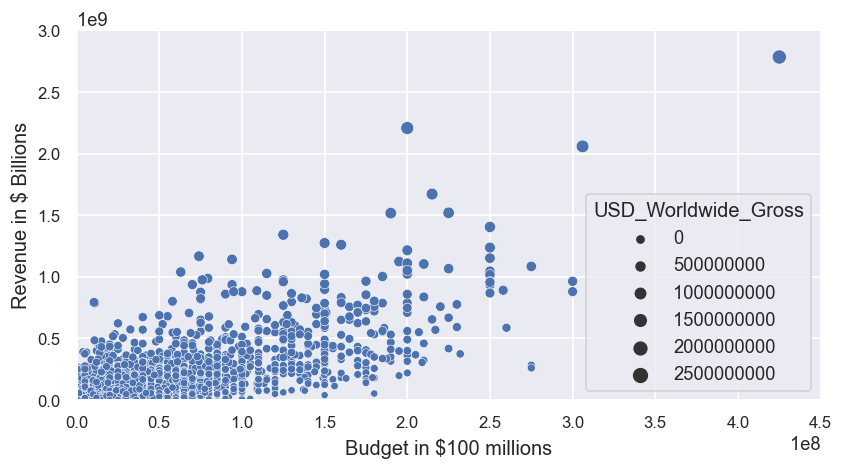

In [92]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(8, 4), dpi=120)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    
    ax = sns.scatterplot(data=data_clean, 
                         x="USD_Production_Budget", 
                         y="USD_Worldwide_Gross",
                         hue="USD_Worldwide_Gross",
                         size="USD_Worldwide_Gross",
                         )
    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel="Revenue in $ Billions",
           xlabel="Budget in $100 millions",
           )
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



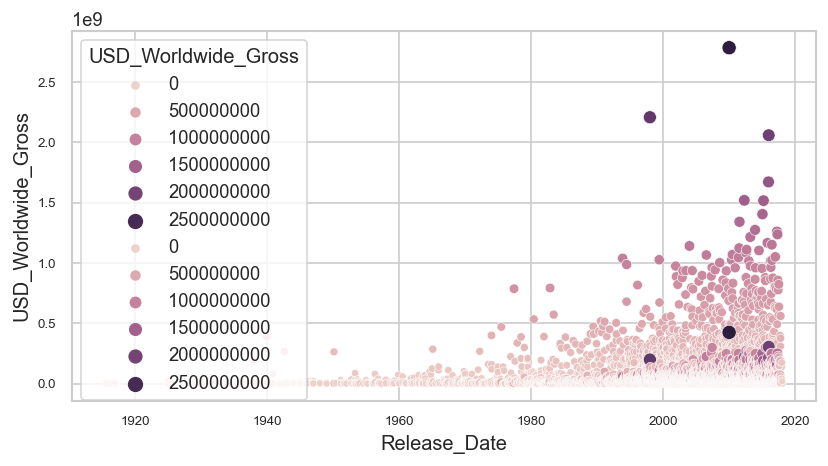

In [93]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(8, 4), dpi=120)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    ax1 = sns.scatterplot(data=data_clean,
                          x="Release_Date",
                          y="USD_Worldwide_Gross",
                          hue="USD_Worldwide_Gross",
                          size="USD_Worldwide_Gross",
                          )
    
    sns.scatterplot(data=data_clean,
                    x="Release_Date",
                    y="USD_Production_Budget",
                    hue="USD_Worldwide_Gross",
                    size="USD_Worldwide_Gross",
                    ax=ax1)
    plt.show()

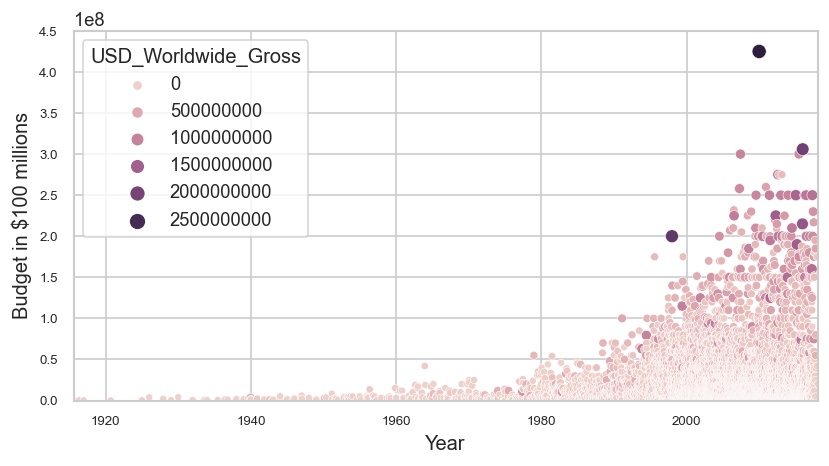

In [103]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(8, 4), dpi=120)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    ax1 = sns.scatterplot(data=data_clean,
                          x="Release_Date",
                          y="USD_Production_Budget",
                          hue="USD_Worldwide_Gross",
                          size="USD_Worldwide_Gross",
                          )
    ax1.set(xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
            ylim=(0, 450000000),
            xlabel="Year",
            ylabel="Budget in $100 millions")

    plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [115]:
datetime_obj = pd.DatetimeIndex(data=data_clean["Release_Date"])
year_data = datetime_obj.year
Decade = (year_data // 10) * 10
data_clean.insert(7, "Decade", Decade)

ValueError: cannot insert Decade, already exists

In [116]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Gross_Revenue,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [134]:
old_films = data_clean[data_clean["Decade"] < 1970]
print(f"{old_films.count().sum()} films were released before 1970s")
print(f"The most expensive film made before 1970s was: {old_films['Movie_Title'].loc[old_films['USD_Production_Budget'].idxmax()]} with a budget of: {old_films['USD_Production_Budget'].max()}")

1224 films were released before 1970s
The most expensive film made before 1970s was: Cleopatra with a budget of: 42000000


In [135]:
old_films.sort_values(by="USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Gross_Revenue,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,29000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-12000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,-4526667,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,1960
...,...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,24800000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,7866000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,29886000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1910


In [130]:
new_films = data_clean[data_clean["Decade"] >= 1970]
new_films.sort_values(by="Decade")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Gross_Revenue,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,-25000000,1970
232,3165,1978-01-01,The Boys from Brazil,12000000,19000000,19000000,7000000,1970
231,3009,1978-01-01,Caravans,14000000,1000000,1000000,-13000000,1970
230,4304,1977-12-23,High Anxiety,3400000,31063038,31063038,27663038,1970
229,2309,1977-11-16,Close Encounters of the Third Kind,20000000,337700000,166000000,317700000,1970
...,...,...,...,...,...,...,...,...
4157,3910,2012-05-10,Trade of Innocents,5800000,15091,15091,-5784909,2010
4156,3658,2012-05-10,Wuthering Heights,8000000,2721534,100915,-5278466,2010
4155,3116,2012-05-10,The Paperboy,12500000,3522153,677200,-8977847,2010
4153,1161,2012-05-10,Taken 2,45000000,377807404,139854287,332807404,2010


# Seaborn Regression Plots

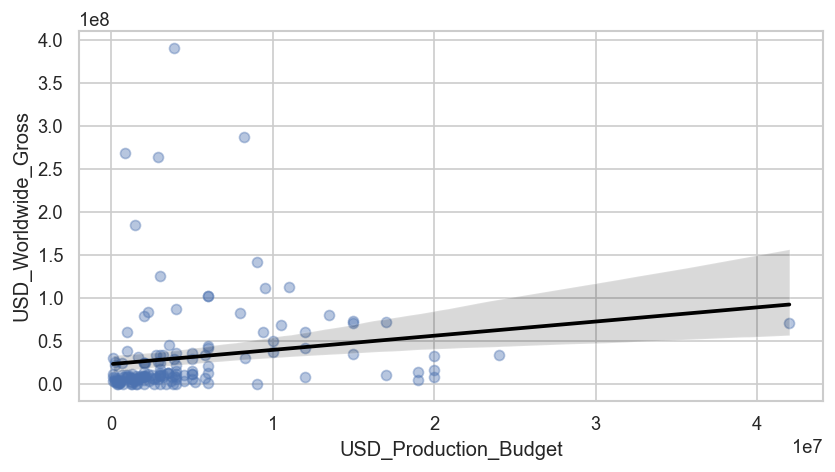

In [139]:
plt.figure(figsize=(8, 4), dpi=120)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross",
                scatter_kws={"alpha": 0.4},
                line_kws={"color": "black"}
                )
    

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

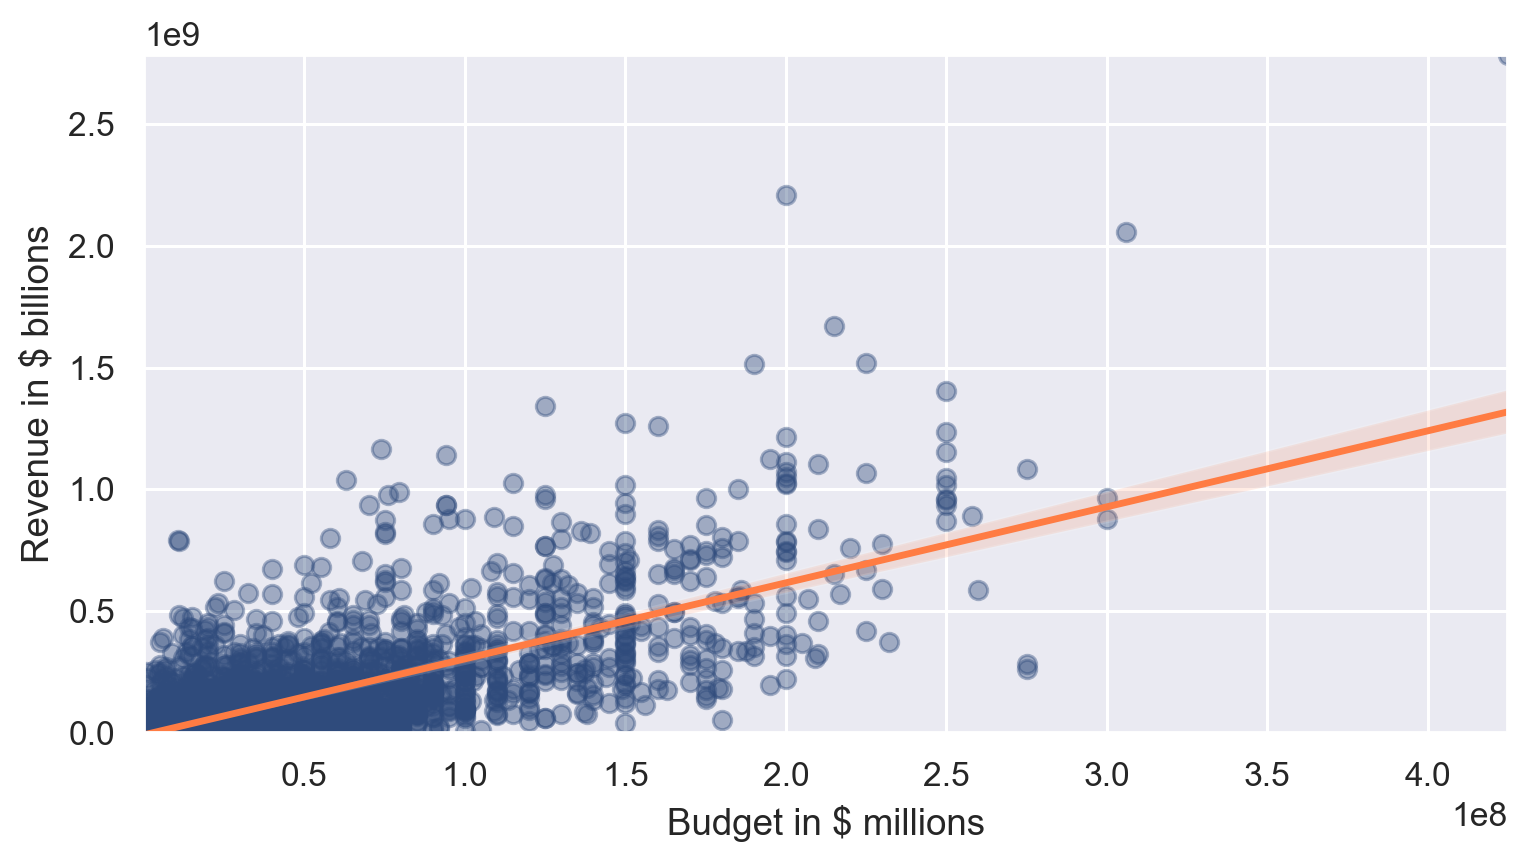

In [146]:
plt.figure(figsize=(8, 4), dpi=220)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross",
                color="#2f4b7c",
                scatter_kws={"alpha": 0.4},
                line_kws={"color": "#ff7c43"})
    ax.set(xlim=(data_clean["USD_Production_Budget"].min(), data_clean["USD_Production_Budget"].max()),
            ylim=(data_clean["USD_Worldwide_Gross"].min(), data_clean["USD_Worldwide_Gross"].max()),
            xlabel="Budget in $ millions",
            ylabel="Revenue in $ billions")
    plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [150]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s) or the variable that we are going to look at
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
# Response Variable or Target or the variable we are trying to predict
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])
# Fit the line so that we can make predictions?? somehow IDK
regression.fit(X, y)

LinearRegression()

In [153]:
# Theta Zero
print(regression.intercept_)
# Theta One
print(regression.coef_)
# R-Squared
regression.score(X, y)

[-8650768.00661096]
[[3.12259592]]


0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [154]:
# The Variable whose value will change
X1 = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
# Target Variable
y1 = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])
# Fit the line
regression.fit(X1, y1)

LinearRegression()

In [155]:
print(regression.intercept_)
print(regression.coef_)
regression.score(X1, y1)

[22821538.63508039]
[[1.64771314]]


0.02937258620576877

In [ ]:
# The above regression.intercept_ tells us that for every $0 we put in the movie budget we wil make around $22 million 
# dollars, but why will it tell us this nonsense. This is because we have chosen the best slope among the straight line
# Now talking about the regression.coef_ -> This tells us that for every $1 added to the budget we will seem to make around $1.6 in profit.
# And lastly our regression.score tells us that our Model explains about 0.02% of the variance in movie revenue.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [156]:
regression.predict(X)

array([[6.40143672e+07],
       [5.90712278e+07],
       [4.25940964e+07],
       ...,
       [3.11171339e+08],
       [9.20254907e+07],
       [5.57758015e+07]])

In [157]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0, 0] * budget

In [158]:
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
